<a href="https://colab.research.google.com/github/rileyseefeldt/MAT421/blob/main/HW22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 22 Ordinary Differential Equations

## 22.1 ODE Initial Value Problem Statement

An ordinary differential equation (ODE) is a form of differentiual equation where the independent variable is in one dimension (only dependent on a single independent varaible).

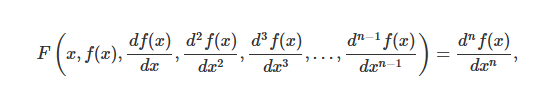

In Contrast, a partial differential equation is a type of differential equation that is dependent on multiple possible variables of any order. For example the PDE of the heat equation in space is written as:

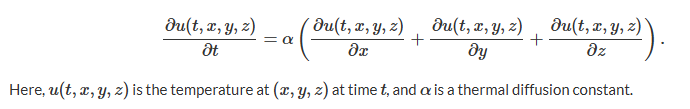

A general solution to a differential equation is a g(x) which satisfies the differential equation. For example a typical solution uses the "initial value" method. For an ODE with order n, if the initial value is known from the 0th to (n-1)th derivative at x = 0, it is possible to approximate the original function accuratly.

## 22.2 Reduction of Order

Many methods for solving initial value problems are designed for first order differential equations. For these methods to be useful for higher order differential equations, we often reduce the order of the ODE to the first order for to solve them. These derivatives are then combined into a vector called a "state vector" which contains f(t) - > f(n-1)(t)

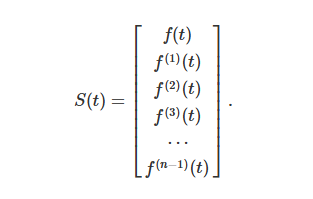



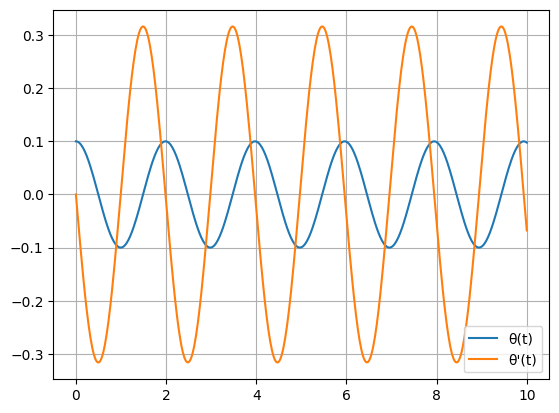

In [ ]:
#reduction of Order
#using pendulum equation to solve

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

#constants
g = 10
L = 1.0

#state vector
def pendulum_ode(t, S):
    theta1, theta2 = S
    dtheta1_dt = theta2
    dtheta2_dt = - (g / L) * theta1
    return [dtheta1_dt, dtheta2_dt]

#initial conditions of pendulum
S0 = [0.1, 0.0]

#time span (needed for spipy method)
t_span = (0, 10)
t_eval = np.linspace(*t_span, 500)

#Use scipy library function to solve
sol = solve_ivp(pendulum_ode, t_span, S0, t_eval=t_eval)


plt.plot(sol.t, sol.y[0], label="θ(t)")
plt.plot(sol.t, sol.y[1], label="θ'(t)")
plt.legend()
plt.grid(True)
plt.show()


## 22.3 The Euler Method

Let dS(t)/dt = F(t,S(t)) be an explicitly defined first order ODE. Also let t be a numerical grid of the interval [t0, tf] with spacing h. Assume t0=0 and tf = Nh for some positive N.

Then the linear approximation of S(t) around tj at tj+1 is

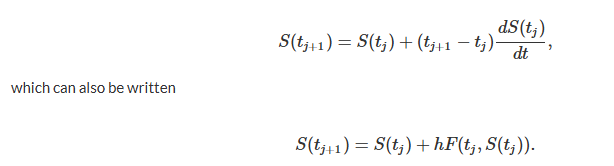

This solves ODE's by recursively computing S(tj) for every tj using the following steps:

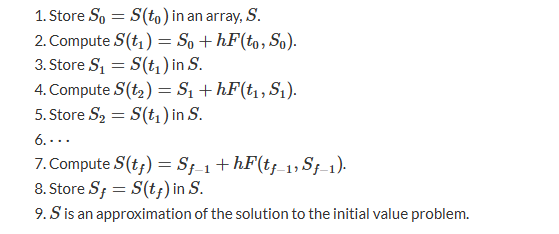


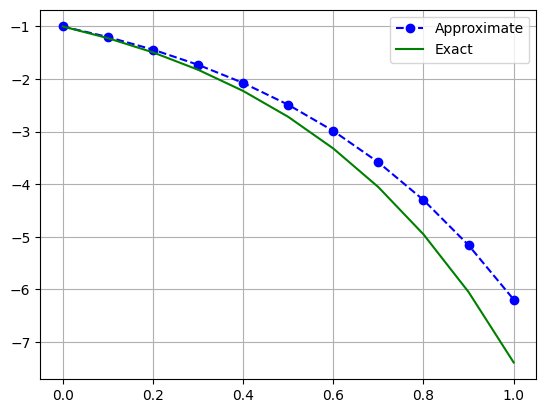

In [15]:
import numpy as np
import matplotlib.pyplot as plt


#ds/dt = 2s
f = lambda t, s: 2*s
#step size
h = 0.1
#grid
t = np.arange(0, 1 + h, h)
s0 = -1

#initial steps for Euler method
s = np.zeros(len(t))
s[0] = s0

#solving Euler equation
for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i], s[i])
plt.plot(t, s, 'bo--', label='Approximate')
plt.plot(t, -np.exp(2*t), 'g', label='Exact')
plt.grid()
plt.legend()
plt.show()